In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AFM7WOT--crEQwL_d5zT1vJBR9ZJDOkvaFmgZdyx1566ZHFh-Sixso
Mounted at /content/drive/


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/UCLA Admission Predictor/admission_predict.csv")

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

So our dataset has 9 columns and total 500 datapoints

In [ ]:
df = df.drop("Serial No.",axis=1)

In [ ]:
df.shape

(500, 8)

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Seperating out x and y

In [ ]:
x=df.drop("Chance of Admit ",axis=1)

In [ ]:
y=df['Chance of Admit ']

In [ ]:
x.shape

(500, 7)

In [ ]:
y.shape

(500,)

In [ ]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [ ]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.0,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.0,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.0,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.0,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.0,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.8,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.0,0.0000,1.00,1.00,1.00


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 27.5 KB


There are no NULL values in the dataset.

In [ ]:
df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

In [ ]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


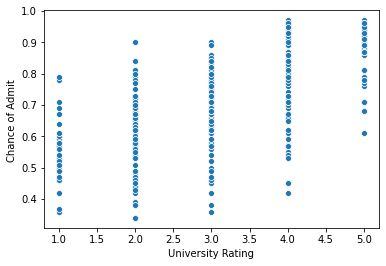

In [ ]:
sns.scatterplot(x['University Rating'],y)

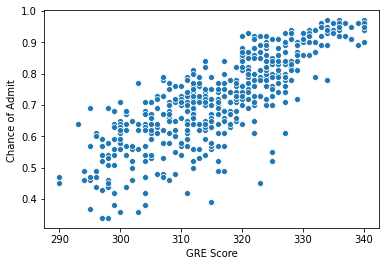

In [ ]:
sns.scatterplot(x['GRE Score'],y)

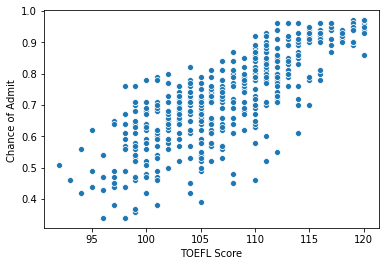

In [ ]:
sns.scatterplot(x['TOEFL Score'],y)

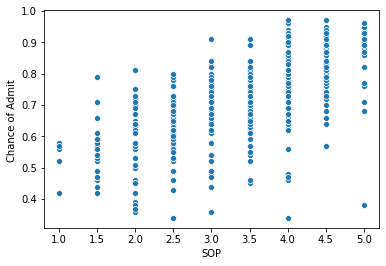

In [ ]:
sns.scatterplot(x['SOP'],y)

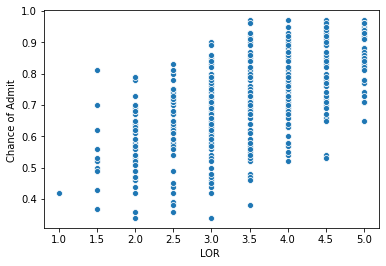

In [ ]:
sns.scatterplot(x['LOR '],y)

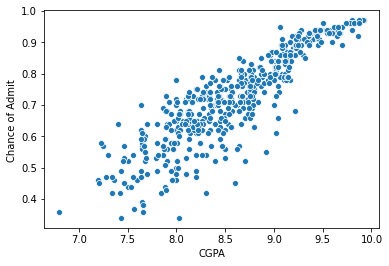

In [ ]:
sns.scatterplot(x['CGPA'],y)

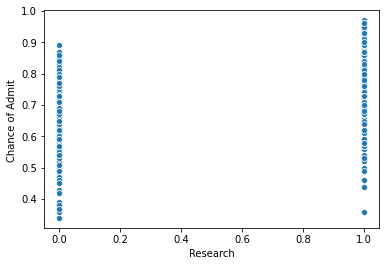

In [ ]:
sns.scatterplot(x['Research'],y)

**Observation:** We can see above graphs, almost all the features has linear relation with chance of admit.


*   e.g CGPA - As CGPA increases, chance of admit also increases.




In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
arr_scaled = scaler.fit_transform(x)

# **Model Building**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(arr_scaled,y,test_size=0.2)

In [ ]:
def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False]
            }
        },
        
        'svr': {
            'model': SVR(),
            'parameters': {
                'gamma': ['auto','scale']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        
        'random_forest': {
            'model': RandomForestRegressor(criterion='mse'),
            'parameters': {
                'n_estimators': [15,20,50,100,200]

            }
        },
        
        'knn': {
            'model': KNeighborsRegressor(algorithm='auto'),
            'parameters': {
                'n_neighbors': [2,5,10,20,50]
            }
        }
    }
    
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])
        
find_best_model(x_train, y_train)


,model,best_parameters,score
0,linear_regression,{'normalize': True},0.808452
1,svr,{'gamma': 'auto'},0.736995
2,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.584435
3,random_forest,{'n_estimators': 200},0.779070
4,knn,{'n_neighbors': 5},0.767973


**As we can see, linear regression is giving better results for this problem statement**

In [ ]:
# Creating Linear Regression Model
model = LinearRegression(normalize=True)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8009348405765231